In [1]:

!pip install scikit-learn
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import math

In [2]:
data_df=pd.read_excel('/content/morning cluster.sx.xlsx')#data processing and normalization
data_df.head()
print(data_df.head())
power_column = data_df['POWER (KW)']
mean_power = power_column.mean()
max_power = power_column.max()
normalized_power = power_column / max_power
print(max_power)
data_df['Normalized POWER (KW)'] = normalized_power

         day      TIME  VOLTAGE  CURRENT    PF   POWER (KW)  \
0 2021-01-01  04:00:00     11.3      130  0.96  2442.607331   
1 2021-01-01  05:00:00     11.2      148  0.96  2756.205522   
2 2021-01-01  06:00:00     11.2      172  0.96  3203.157769   
3 2021-01-01  07:00:00     11.5      218  0.96  4168.561320   
4 2021-01-02  04:00:00     11.5      100  0.95  1892.265507   

   "WEEKEND/WEEKDAY"  SEASON  Temp (F)  Humidity (%) time Period  cluster  
0                  0       1        78            49     Morning        1  
1                  0       1        78            49     Morning        1  
2                  0       1        78            49     Morning        1  
3                  0       1        83            34     Morning        1  
4                  0       1        78            48     Morning        1  
5439.249217650538


In [3]:
x = data_df[["VOLTAGE", "CURRENT", "PF",'"WEEKEND/WEEKDAY"', "SEASON", "Temp (F)", "Humidity (%)"]]
y=data_df ['Normalized POWER (KW)'].values
print(y)


[0.44907068 0.50672536 0.58889704 ... 0.46417726 0.49467066 0.77903369]


In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)


In [5]:
!pip install sklearn
!pip install --upgrade scikit-learn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.metrics import mean_squared_error
x_train_scaled = scaler.fit_transform(x_train)


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 49.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [6]:

x_test_scaled = scaler.transform(x_test)

elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio is the mix between L1 and L2 regularization
elastic_net_model.fit(x_train_scaled, y_train)

# Make predictions
elastic_net_predictions = elastic_net_model.predict(x_test_scaled)



In [7]:
# Evaluate the model
mae = mean_absolute_error(y_test, elastic_net_predictions)
elastic_net_mse = mean_squared_error(y_test, elastic_net_predictions)
elastic_net_r2 = r2_score(y_test, elastic_net_predictions)
mape=np.mean(np.abs((y_test -elastic_net_predictions ) / y_test)) * 100
rmse = math.sqrt(elastic_net_mse)
print('MSE:', elastic_net_mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('MAPE:', mape)
print(f'Elastic Net Mean Squared Error: {elastic_net_mse}')
print(f'Elastic Net R² Score: {elastic_net_r2}')


MSE: 0.0046835261830153576
RMSE: 0.06843629287896413
MAE: 0.05587624393609693
MAPE: 17.128136567970447
Elastic Net Mean Squared Error: 0.0046835261830153576
Elastic Net R² Score: 0.9028344770374132


In [ ]:
y_train = y_train.ravel().reshape(-1, 1)#file storage step
ml = LinearRegression()
ml.fit(x_train, y_train)
import joblib
joblib.dump(ml, 'model.joblib')
loaded_model = joblib.load('model.joblib')

Text(0.5, 1.0, 'Actual vs. Predicted')

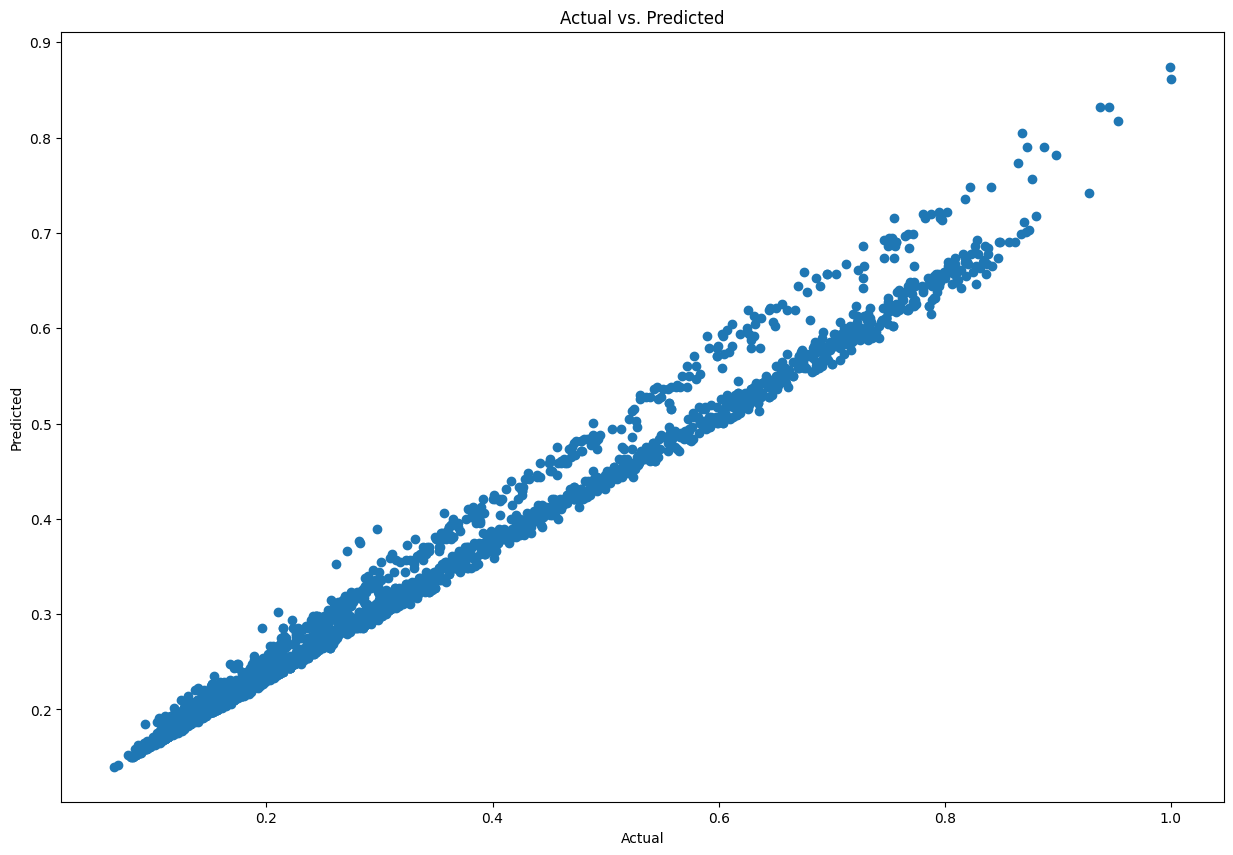

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,elastic_net_predictions)
plt.xlabel('Actual')
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")

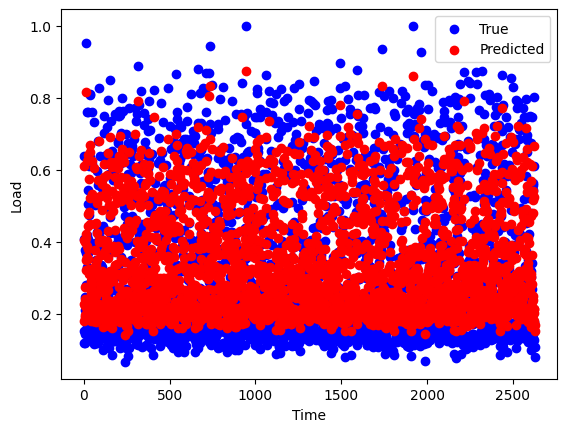

In [ ]:
plt.scatter(range(len(y_test)), y_test, color='blue', label='True')
plt.scatter(range(len(elastic_net_predictions)), elastic_net_predictions, color='red', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Load')
plt.legend()
plt.show()

In [ ]:

pred_y_df = pd.DataFrame({'Actual Value': y_test, 'Predicted value':elastic_net_predictions,'Difference': y_test-elastic_net_predictions})
pred_y_df[0:169]

,Actual Value,Predicted value,Difference
0,0.406936,0.403724,0.003212
1,0.637462,0.610504,0.026957
2,0.118043,0.177953,-0.059911
3,0.152101,0.226484,-0.074382
4,0.209224,0.241254,-0.032030
...,...,...,...
164,0.155717,0.218044,-0.062326
165,0.650927,0.540874,0.110052
166,0.647657,0.606284,0.041373
167,0.282300,0.302444,-0.020143


In [ ]:
output_file_path = '//content/patternpredicted.xlsx'
pred_y_df.to_excel(output_file_path, index=False)

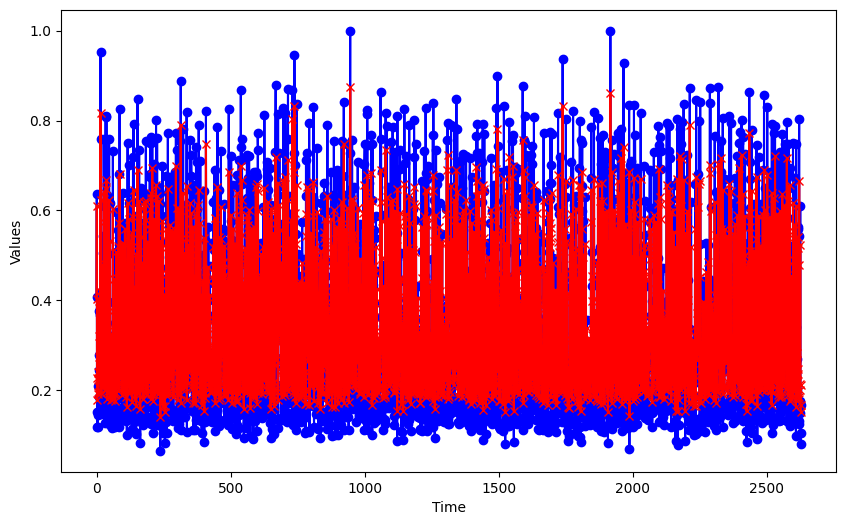

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot( range(len(y_test)),y_test,color='blue', marker='o')
plt.plot(range(len(elastic_net_predictions)),elastic_net_predictions,color='red',  marker='x')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()

In [ ]:
data_df1=pd.read_excel('/content/patern1.xlsx')#data processing and normalization
data_df1.head()
print(data_df1.head())
power_column = data_df1['POWER (KW)']
mean_power = power_column.mean()
max_power = power_column.max()
normalizedpower = power_column / max_power
print(max_power)
data_df1['Normalized POWER (KW)'] = normalizedpower

        DATE      TIME  VOLTAGE  CURRENT    PF   POWER (KW)  \
0 2021-10-20  01:00:00     11.6       69  0.92  1275.426789   
1 2021-10-20  02:00:00     11.6       69  0.92  1275.426789   
2 2021-10-20  03:00:00     11.6       69  0.92  1275.426789   
3 2021-10-20  04:00:00     11.5       69  0.92  1264.431731   
4 2021-10-20  05:00:00     11.5       69  0.92  1264.431731   

   "WEEKEND/WEEKDAY"  SEASON  Temp (F)  Humidity (%)  
0                  0       0        79            80  
1                  0       0        79            80  
2                  0       0        79            80  
3                  0       0        87            48  
4                  0       0        87            48  
2793.457777829992


In [ ]:
x1= data_df1[["VOLTAGE", "CURRENT", "PF",'"WEEKEND/WEEKDAY"', "SEASON", "Temp (F)", "Humidity (%)"]]
y1=data_df1 ['Normalized POWER (KW)'].values


In [ ]:
ml.fit(x1,y1)#testing
x_predicted=ml.predict(x1)


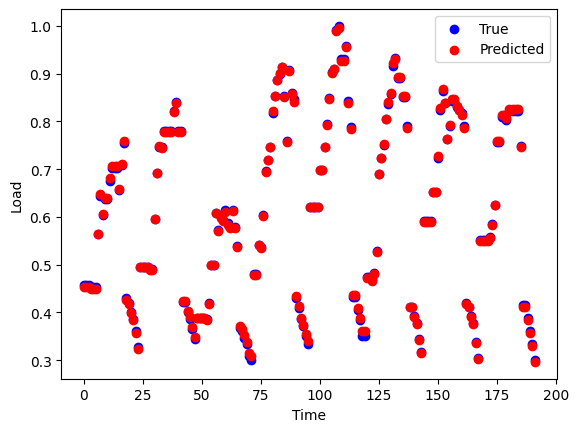

In [ ]:

plt.scatter(range(len(y1)), y1, color='blue', label='True')
plt.scatter(range(len(x_predicted)), x_predicted, color='red', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Load')
plt.legend()
plt.show()

In [ ]:
y_pred = y_pred.ravel() # Reshape y_pred to be 1-dimensional
pred_y_df = pd.DataFrame({'Actual Value': y1, 'Predicted value':x_predicted,'Difference': y1-x_predicted})
pred_y_df[0:169]

,Actual Value,Predicted value,Difference
0,0.311976,0.312022,-0.000046
1,0.311976,0.312022,-0.000046
2,0.311976,0.312022,-0.000046
3,0.387334,0.387206,0.000127
4,0.437062,0.436559,0.000503
...,...,...,...
164,0.120694,0.136150,-0.015456
165,0.095284,0.112526,-0.017241
166,0.085756,0.103697,-0.017941
167,0.298558,0.300869,-0.002312


In [ ]:
output_file_path = '//content/patternpredicted.xlsx'
pred_y_df.to_excel(output_file_path, index=False)

In [ ]:

from sklearn.metrics import r2_score
r2 = r2_score(y1, x_predicted)
print(f'R^2: {r2}')

R^2: 0.9962603610609616
